# CS-5824 / Advanced Machine Learning
# Assignment 1 Section B [ 40 Points ]

In this assignment, **you need to complete three sections** which are based on:

1. Logistic regression
2. MLE
3. Evaluation

## Submission guideline

1. Click the Save button at the top of the Jupyter Notebook.
2. Please make sure to have entered your Virginia Tech PID below.
3. Select Edit -> Clear All Output. This will clear all the outputs from all cells (but will keep the content of ll cells).
4. Select Runtime -> Restart and Run All. This will run all the cells in order.
5. Once you've rerun everything, select File -> Print -> Save as PDF
6. Look at the PDF file and make sure all your solutions are there, displayed correctly. 
7. Upload **both** the PDF file and this notebook.
8. Please **DO NOT** upload any data.

### Please Write Your VT PID Here: ankitparekh

# Section 0. Environment Set Up

In [1]:
!pip install scipy==1.1.0 Pillow==4.3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Mount your google drive in google colab

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


Append the directory to your python path using sys

In [3]:
import sys
prefix = '/content/gdrive/My Drive/'
# modify "customized_path_to_your_homework" here to where you uploaded your homework
customized_path_to_your_homework = 'ECE_5424_AML/HW1/'
sys_path = prefix + customized_path_to_your_homework
sys.path.append(sys_path)

Run some setup code for this notebook.

In [4]:
from __future__ import print_function
import random
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Section 1. Logistic Regression [ 18 points ]

In this problem, we’ll apply logistic regression to a data set of spam email. 
This data consists of 4601 email messages, from which 57 features have been extracted. These are as follows:
- 48 features in [0, 100], giving the percentage of words in a given message which match a given
word on a list containing, e.g., “business”, “free”, etc.
- 6 features in [0, 100], giving the percentage of characters in the email that match characters on a
list containing, e.g., “$”, “#”, etc.
- Feature 55: The average length of an uninterrupted sequence of capital letters.
- Feature 56: The length of the longest uninterrupted sequence of capital letters.
- Feature 57: The sum of the lengths of uninterrupted sequences of capital letters.


There are files spam.train.dat and spam.test.dat (provided in the assignment files) in which
each row is an email. There are 3000 training and 1601 test examples. The final column in each file
indicates whether the email was spam.

The files can be loaded using the block of code below. You will answer the following questions using the data provided. 

In [5]:
prefix = '/content/gdrive/My Drive/'
# modify "customized_path_to_your_homework" here to where your data is
customized_path_to_your_homework = 'ECE_5424_AML/HW1/'
train_path = prefix + customized_path_to_your_homework + 'data/spam.train.dat'
train_set = np.genfromtxt(train_path)
train_set

array([[0.00e+00, 0.00e+00, 0.00e+00, ..., 3.20e+01, 9.10e+02, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 7.00e+00, 4.50e+01, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 3.00e+00, 7.00e+00, 0.00e+00],
       ...,
       [2.00e-01, 0.00e+00, 2.00e-01, ..., 6.30e+01, 5.45e+02, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 2.80e+01, 1.07e+02, 1.00e+00],
       [0.00e+00, 0.00e+00, 5.60e-01, ..., 2.20e+01, 2.37e+02, 1.00e+00]])

### Question 1. [ 3 points ]

Build a Logistic Regression model to classify whether an email is spam or not using the *spam* data set. Report your training and test performance.

In [6]:
#Build your model

# Importing required sklearn modules
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Creating training dataset by assigning the last column to the labels (Y)
x_train, y_train = train_set[:,:-1],train_set[:,-1]

#Tranforming training data and training model
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
model = LogisticRegression(random_state=0,penalty='none').fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [7]:
#Report training and test performance here

# Loading test data 
test_path = prefix + customized_path_to_your_homework + 'data/spam.test.dat'
test_set = np.genfromtxt(test_path)
x_test, y_test = test_set[:,:-1],test_set[:,-1]
x_test = scaler.transform(x_test)

# Training Accuracy
train_accuracy = model.score(x_train, y_train)*100
print("Training Accuracy: ", train_accuracy, " %")

#Testing the model
test_accuracy = model.score(x_test, y_test)*100
print("Testing Accuracy: ", test_accuracy, " %")


Training Accuracy:  93.46666666666667  %
Testing Accuracy:  92.0049968769519  %


### Question 2. [ 3 points ]

Plot the learning curve for this model. What is the Bias/Variance trade-off for this model ?

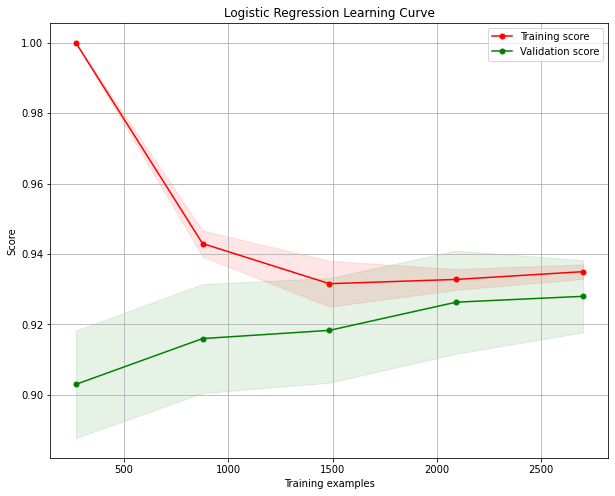

In [8]:
#Plot the learning curve

# Gathering training and validation scores using the learning_curve method
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
        LogisticRegression(random_state=0,penalty='none'),
        x_train,
        y_train,
        scoring='accuracy',
        cv=10,
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5)
    )

# Computing mean and standard deviations for the scores
train_scores_avg = train_scores.mean(axis = 1)
val_scores_avg = val_scores.mean(axis = 1)

train_scores_std = np.std(train_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plotting the learning curve
import matplotlib.pyplot as plt

plt.plot(
    train_sizes, train_scores_avg, "o-", color="r", markersize=5, label="Training score")
plt.fill_between(train_sizes,
    train_scores_avg - train_scores_std,
    train_scores_avg + train_scores_std,
    alpha=0.1,
    color="r",)
plt.plot(
    train_sizes, val_scores_avg, "o-", color="g", markersize=5, label="Validation score")
plt.fill_between(
    train_sizes,
    val_scores_avg - val_scores_std,
    val_scores_avg + val_scores_std,
    alpha=0.1,
    color="g",)
plt.title("Logistic Regression Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
plt.legend(loc="best")

In [9]:
#Comment on the Bias/Variance trade-off

Intially when the training sample size is less than 1000, the training accuracy is very high (model is fitting well on less number of data points) and validation accuracy is very low, which suggests the model is overfitting. The model has high variance and low bias. 

But as we increase the training sample size ( from training sample size of 1000 till 2500), we see a gradual decrease in difference between train and validation accuracy, and the model starting to exhibit lower variance and higher bias than before. The region where the training accuracy and validation accuracy have the lowest difference is optimal for the bias-variance tradeoff and the model is fitting well on the dataset.

### Question 3. [ 3 points ]

Apply L2-regularized logistic regression. Use cross-validation to determine an appropriate regularization penalty. Report your procedure and the value you find. What training and test performance do you get with this value?

In [10]:
#Apply L2-regularized logistic regression
from sklearn.model_selection import train_test_split
x_train, y_train = train_set[:,:-1],train_set[:,-1]
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [11]:
#Perform cross-validation 
from sklearn.model_selection import GridSearchCV
hyperparams = {'C':[x*0.1 for x in range(1,11)]}
gridSearch = GridSearchCV(LogisticRegression(random_state=0,penalty='l2',max_iter=1000,solver='liblinear'),hyperparams,scoring='accuracy',n_jobs=-1,cv=10,verbose=True)
gridSearch = gridSearch.fit(x_train,y_train)

print("Estimator with highest score (best_estimator):", gridSearch.best_estimator_)
print("Mean cross-validated score with the best_estimator: ", gridSearch.best_score_)
print("Parameter value for best score: ", gridSearch.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Estimator with highest score (best_estimator): LogisticRegression(C=0.8, max_iter=1000, random_state=0, solver='liblinear')
Mean cross-validated score with the best_estimator:  0.9269999999999999
Parameter value for best score:  {'C': 0.8}


In [12]:
#Report your procedure and training and test performance
print("For L2-regularized logistic regression:")
l2_model = gridSearch.best_estimator_
x_test, y_test = test_set[:,:-1],test_set[:,-1]
x_test = scaler.transform(x_test)

# Training Accuracy for Best Estimator
l2_train_accuracy = l2_model.score(x_train, y_train)*100
print("Best Training Accuracy: ", l2_train_accuracy, " %")

#Testing Accuracy for Best Estimator
l2_test_accuracy = l2_model.score(x_test, y_test)*100
print("Best Testing Accuracy: ", l2_test_accuracy, " %")

For L2-regularized logistic regression:
Best Training Accuracy:  93.13333333333334  %
Best Testing Accuracy:  92.06745783885071  %


### Question 4. [ 3 points ]

Apply L1-regularized logistic regression. Use cross-validation to determine an appropriate regularization penalty. Report your procedure and the value you find. What training and test performance do you get with this value?

In [13]:
#Apply L1-regularized logistic regression
from sklearn.model_selection import train_test_split
x_train, y_train = train_set[:,:-1],train_set[:,-1]
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [14]:
#Perform cross-validation 
from sklearn.model_selection import GridSearchCV
hyperparams = {'C':[x*0.1 for x in range(1,11)]}
gridSearch = GridSearchCV(LogisticRegression(random_state=0,penalty='l1',max_iter=1000,solver='liblinear'),hyperparams,scoring='accuracy',n_jobs=-1,cv=10,verbose=True)
gridSearch = gridSearch.fit(x_train,y_train)

print("Estimator with highest score (best_estimator):", gridSearch.best_estimator_)
print("Mean cross-validated score with the best_estimator: ", gridSearch.best_score_)
print("Parameter value for best score: ", gridSearch.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Estimator with highest score (best_estimator): LogisticRegression(C=0.9, max_iter=1000, penalty='l1', random_state=0,
                   solver='liblinear')
Mean cross-validated score with the best_estimator:  0.9296666666666666
Parameter value for best score:  {'C': 0.9}


In [15]:
#Report your procedure and training and test performance
print("For L1-regularized logistic regression:")
l1_model = gridSearch.best_estimator_
x_test, y_test = test_set[:,:-1],test_set[:,-1]
x_test = scaler.transform(x_test)

# Training Accuracy for Best Estimator
l1_train_accuracy = l1_model.score(x_train, y_train)*100
print("Best Training Accuracy: ", l1_train_accuracy, " %")

#Testing Accuracy for Best Estimator
l1_test_accuracy = l1_model.score(x_test, y_test)*100
print("Best Testing Accuracy: ", l1_test_accuracy, " %")

For L1-regularized logistic regression:
Best Training Accuracy:  93.33333333333333  %
Best Testing Accuracy:  91.94253591505309  %


### Question 5. [ 3 points ]

What are the advantages and disadvantages of the two models with repect to this problem? For example, have there been a lot of sparceness in the model, or what kind of features have been removed?

In [16]:
# Advantages and disadvantages of the two models

**$𝐿_1$ Regularization Model:**

$Advantage$: We prefer $𝐿_1$ for sparse solutions and preventing overfitting. It is used when we have a large number of features (like in this case of 57 features) as it helps with feature selection as the features with zero coefficients can be removed.

$Disadvantage$: Its solution is not in a closed form, and hence cannot be perfectly differentiated, and thus becomes computationally . 

**$𝐿_2$ Regularization Model:**

$Advantage$: It has the advantage of being differentiable and smooth as solution is in closed form as it’s a square of a weight. $𝐿_2$ regularization is computationally efficient because of having analytical solutions.

$Disadvantage$: It cannot be used to completely eliminate features.

### Question 6. [3 points]

Transform the features with the basis function of your choice. Retrain the two models above and report the model performances. Why did you choose this basis function ?

In [17]:
#Retrain the two models above 
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer, StandardScaler

class GaussianBasis(BaseEstimator, TransformerMixin):
    def __init__(self, N):
        self.N = N # number of basis functions
    
    @staticmethod
    def _gaussian_basis(x, avg, std, axis=None):
        arg = (x - avg) / std
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        self.avgs = np.linspace(X.min(), X.max(), self.N)
        self.std = self.avgs[1] - self.avgs[0]
        return self
        
    def transform(self, X):
        return self._gaussian_basis(X[:, :, np.newaxis], self.avgs, self.std, axis=1)

x_train, y_train = train_set[:,:-1],train_set[:,-1]
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test, y_test = test_set[:,:-1],test_set[:,-1]
x_test = scaler.transform(x_test)

# L1 & L2 Models using Gaussian Basis

hyperparams_gaussian = {'C':[x*0.2 for x in range(1,6)]}

gridSearch_L1 = GridSearchCV(LogisticRegression(random_state=0,penalty='l1',max_iter=40,solver='liblinear'),hyperparams_gaussian,scoring='accuracy',n_jobs=-1,cv=2,verbose=True,refit=True)
gaussian_L1 = make_pipeline(GaussianBasis(20), gridSearch_L1)
gaussian_L1 = gaussian_L1.fit(x_train, y_train)

gridSearch_L2 = GridSearchCV(LogisticRegression(random_state=0,penalty='l2',max_iter=40,solver='liblinear'),hyperparams_gaussian,scoring='accuracy',n_jobs=-1,cv=2,verbose=True,refit=True)
gaussian_L2 = make_pipeline(GaussianBasis(20), gridSearch_L2)
gaussian_L2 = gaussian_L2.fit(x_train, y_train)

# L1 & L2 Models using Polynomial Basis

hyperparams_polynomial_L2 = {'C':[x*0.05 for x in range(3,8)]}

hyperparams_polynomial_L1 = {'C':[x*0.05 for x in range(7,11)]}

gridSearch_L1 = GridSearchCV(LogisticRegression(random_state=0,penalty='l1',max_iter=50,solver='liblinear'),hyperparams_polynomial_L1,scoring='accuracy',n_jobs=-1,cv=2,verbose=True,refit=True)
polynomial_L1 = make_pipeline(PolynomialFeatures(2), gridSearch_L1)
polynomial_L1 = polynomial_L1.fit(x_train, y_train)

gridSearch_L2 = GridSearchCV(LogisticRegression(random_state=0,penalty='l2',max_iter=50,solver='liblinear'),hyperparams_polynomial_L2,scoring='accuracy',n_jobs=-1,cv=2,verbose=True,refit=True)
polynomial_L2 = make_pipeline(PolynomialFeatures(2), gridSearch_L2)
polynomial_L2 = polynomial_L2.fit(x_train, y_train)

# L1 & L2 Models using SplineTransformer Basis

hyperparams_polynomial_L2 = {'C':[x*0.05 for x in range(3,8)]}

hyperparams_polynomial_L1 = {'C':[x*0.05 for x in range(7,11)]}

gridSearch_L1 = GridSearchCV(LogisticRegression(random_state=0,penalty='l1',max_iter=50,solver='liblinear'),hyperparams_polynomial_L1,scoring='accuracy',n_jobs=-1,cv=2,verbose=True,refit=True)
spline_L1 = make_pipeline(SplineTransformer(), gridSearch_L1)
spline_L1 = spline_L1.fit(x_train, y_train)

gridSearch_L2 = GridSearchCV(LogisticRegression(random_state=0,penalty='l2',max_iter=50,solver='liblinear'),hyperparams_polynomial_L2,scoring='accuracy',n_jobs=-1,cv=2,verbose=True,refit=True)
spline_L2 = make_pipeline(SplineTransformer(), gridSearch_L2)
spline_L2 = spline_L2.fit(x_train, y_train)

# L1 & L2 Models using StandardScaler Basis

hyperparams_polynomial_L2 = {'C':[x*0.05 for x in range(3,8)]}

hyperparams_polynomial_L1 = {'C':[x*0.05 for x in range(7,11)]}

gridSearch_L1 = GridSearchCV(LogisticRegression(random_state=0,penalty='l1',max_iter=50,solver='liblinear'),hyperparams_polynomial_L1,scoring='accuracy',n_jobs=-1,cv=2,verbose=True,refit=True)
scaler_L1 = make_pipeline(StandardScaler(), gridSearch_L1)
scaler_L1 = scaler_L1.fit(x_train, y_train)

gridSearch_L2 = GridSearchCV(LogisticRegression(random_state=0,penalty='l2',max_iter=50,solver='liblinear'),hyperparams_polynomial_L2,scoring='accuracy',n_jobs=-1,cv=2,verbose=True,refit=True)
scaler_L2 = make_pipeline(StandardScaler(), gridSearch_L2)
scaler_L2 = scaler_L2.fit(x_train, y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Fitting 2 folds for each of 5 candidates, totalling 10 fits
Fitting 2 folds for each of 4 candidates, totalling 8 fits
Fitting 2 folds for each of 5 candidates, totalling 10 fits
Fitting 2 folds for each of 4 candidates, totalling 8 fits
Fitting 2 folds for each of 5 candidates, totalling 10 fits
Fitting 2 folds for each of 4 candidates, totalling 8 fits
Fitting 2 folds for each of 5 candidates, totalling 10 fits


In [18]:
#Report the model performances
print("Guassian Basis:")
gaussian_L1_train_accuracy = gaussian_L1.score(x_train, y_train)*100
print("L1 Training Accuracy: ", gaussian_L1_train_accuracy, " %")
gaussian_L1_test_accuracy = gaussian_L1.score(x_test, y_test)*100
print("L1 Testing Accuracy: ", gaussian_L1_test_accuracy, " %")
gaussian_L2_train_accuracy = gaussian_L2.score(x_train, y_train)*100
print("L2 Training Accuracy: ", gaussian_L2_train_accuracy, " %")
gaussian_L2_test_accuracy = gaussian_L2.score(x_test, y_test)*100
print("L2 Testing Accuracy: ", gaussian_L2_test_accuracy, " %")

print("Polynomial Basis:")
polynomial_L1_train_accuracy = polynomial_L1.score(x_train, y_train)*100
print("L1 Training Accuracy: ", polynomial_L1_train_accuracy, " %")
polynomial_L1_test_accuracy = polynomial_L1.score(x_test, y_test)*100
print("L1 Testing Accuracy: ", polynomial_L1_test_accuracy, " %")
polynomial_L2_train_accuracy = polynomial_L2.score(x_train, y_train)*100
print("L2 Training Accuracy: ", polynomial_L2_train_accuracy, " %")
polynomial_L2_test_accuracy = polynomial_L2.score(x_test, y_test)*100
print("L2 Testing Accuracy: ", polynomial_L2_test_accuracy, " %")

print("Spline Basis:")
spline_L1_train_accuracy = spline_L1.score(x_train, y_train)*100
print("L1 Training Accuracy: ", spline_L1_train_accuracy, " %")
spline_L1_test_accuracy = spline_L1.score(x_test, y_test)*100
print("L1 Testing Accuracy: ", spline_L1_test_accuracy, " %")
spline_L2_train_accuracy = spline_L2.score(x_train, y_train)*100
print("L2 Training Accuracy: ", spline_L2_train_accuracy, " %")
spline_L2_test_accuracy = spline_L2.score(x_test, y_test)*100
print("L2 Testing Accuracy: ", spline_L2_test_accuracy, " %")

print("Scaler Basis:")
scaler_L1_train_accuracy = scaler_L1.score(x_train, y_train)*100
print("L1 Training Accuracy: ", scaler_L1_train_accuracy, " %")
scaler_L1_test_accuracy = scaler_L1.score(x_test, y_test)*100
print("L1 Testing Accuracy: ", scaler_L1_test_accuracy, " %")
scaler_L2_train_accuracy = scaler_L2.score(x_train, y_train)*100
print("L2 Training Accuracy: ", scaler_L2_train_accuracy, " %")
scaler_L2_test_accuracy = scaler_L2.score(x_test, y_test)*100
print("L2 Testing Accuracy: ", scaler_L2_test_accuracy, " %")

Guassian Basis:
L1 Training Accuracy:  61.53333333333333  %
L1 Testing Accuracy:  58.83822610868208  %
L2 Training Accuracy:  61.53333333333333  %
L2 Testing Accuracy:  58.83822610868208  %
Polynomial Basis:
L1 Training Accuracy:  96.53333333333333  %
L1 Testing Accuracy:  93.06683322923173  %
L2 Training Accuracy:  97.63333333333334  %
L2 Testing Accuracy:  92.06745783885071  %
Spline Basis:
L1 Training Accuracy:  92.56666666666666  %
L1 Testing Accuracy:  91.63023110555902  %
L2 Training Accuracy:  91.53333333333333  %
L2 Testing Accuracy:  90.81823860087445  %
Scaler Basis:
L1 Training Accuracy:  93.23333333333333  %
L1 Testing Accuracy:  92.06745783885071  %
L2 Training Accuracy:  93.0  %
L2 Testing Accuracy:  91.94253591505309  %


In [19]:
#Why choosing this basis function?

After trying Gaussian, Polynomial, Spline and StandardScaler Basis, we can observe that Gaussian models have relatively low training and testing performances. On the other hand, Polynomial Basis gives great results, and the $L_1$ regularized model has the best performance so we should choose it.

A likely explanation for better result with Polynomial Basis is **PolynomialsFeatures** allows modeling for non-linear relations, yielding more predictive and explanatory power than linear models. It achieves it by augmenting the input features with some transformations and then using the transformed features in the linear model. It creates a new feature matrix that consisting of features transformed by putting original features to a higher degree and also modelling for important relationships between input features. This has resulted in a higher training and testing performance.

# Section 2. MLE [15 pts]

For the following problems, we will a collaborative filtering data set. These data
are originally from http://eigentaste.berkeley.edu/dataset/, however, they have been altered somewhat for this HW, so you should use the files directly shared from us. These problems will only examine the marginal distribution of the ratings themselves. Assuming that the data set is in your homework path on google drive, the ratings can be loaded into your collab session using the block of code in the next cell. This will give you a 1761439 × 3 matrix of doubles. Right now we only care about the ratings, which are the third column. You’ll be asked to produce figures. Include these figures in your notebook.

In [20]:
import numpy as np
prefix = '/content/gdrive/My Drive/'
# modify "customized_path_to_your_homework" here to where your data is
customized_path_to_your_homework = 'ECE_5424_AML/HW1/'
data_path = prefix + customized_path_to_your_homework + 'data/jester_ratings.dat'
data = np.genfromtxt(data_path)
data

array([[ 1.000000e+00,  5.000000e+00,  2.275770e-01],
       [ 1.000000e+00,  7.000000e+00, -9.279702e+00],
       [ 1.000000e+00,  8.000000e+00, -9.267760e+00],
       ...,
       [ 6.397800e+04,  1.240000e+02, -9.022733e+00],
       [ 6.397800e+04,  5.800000e+01, -8.644745e+00],
       [ 6.397800e+04,  4.400000e+01, -8.445059e+00]])

### Question 1. [ 5 points ]

Generate a set of normalized histograms (histograms which have an area of one) of the ratings and
qualitatively describe the empirical distributions that you see. Try several different bin sizes and explain your choices. Are the resulting density estimates uni- or multi-modal? Where do the peaks
appear to be? Do these answers change as you vary the number of bins?

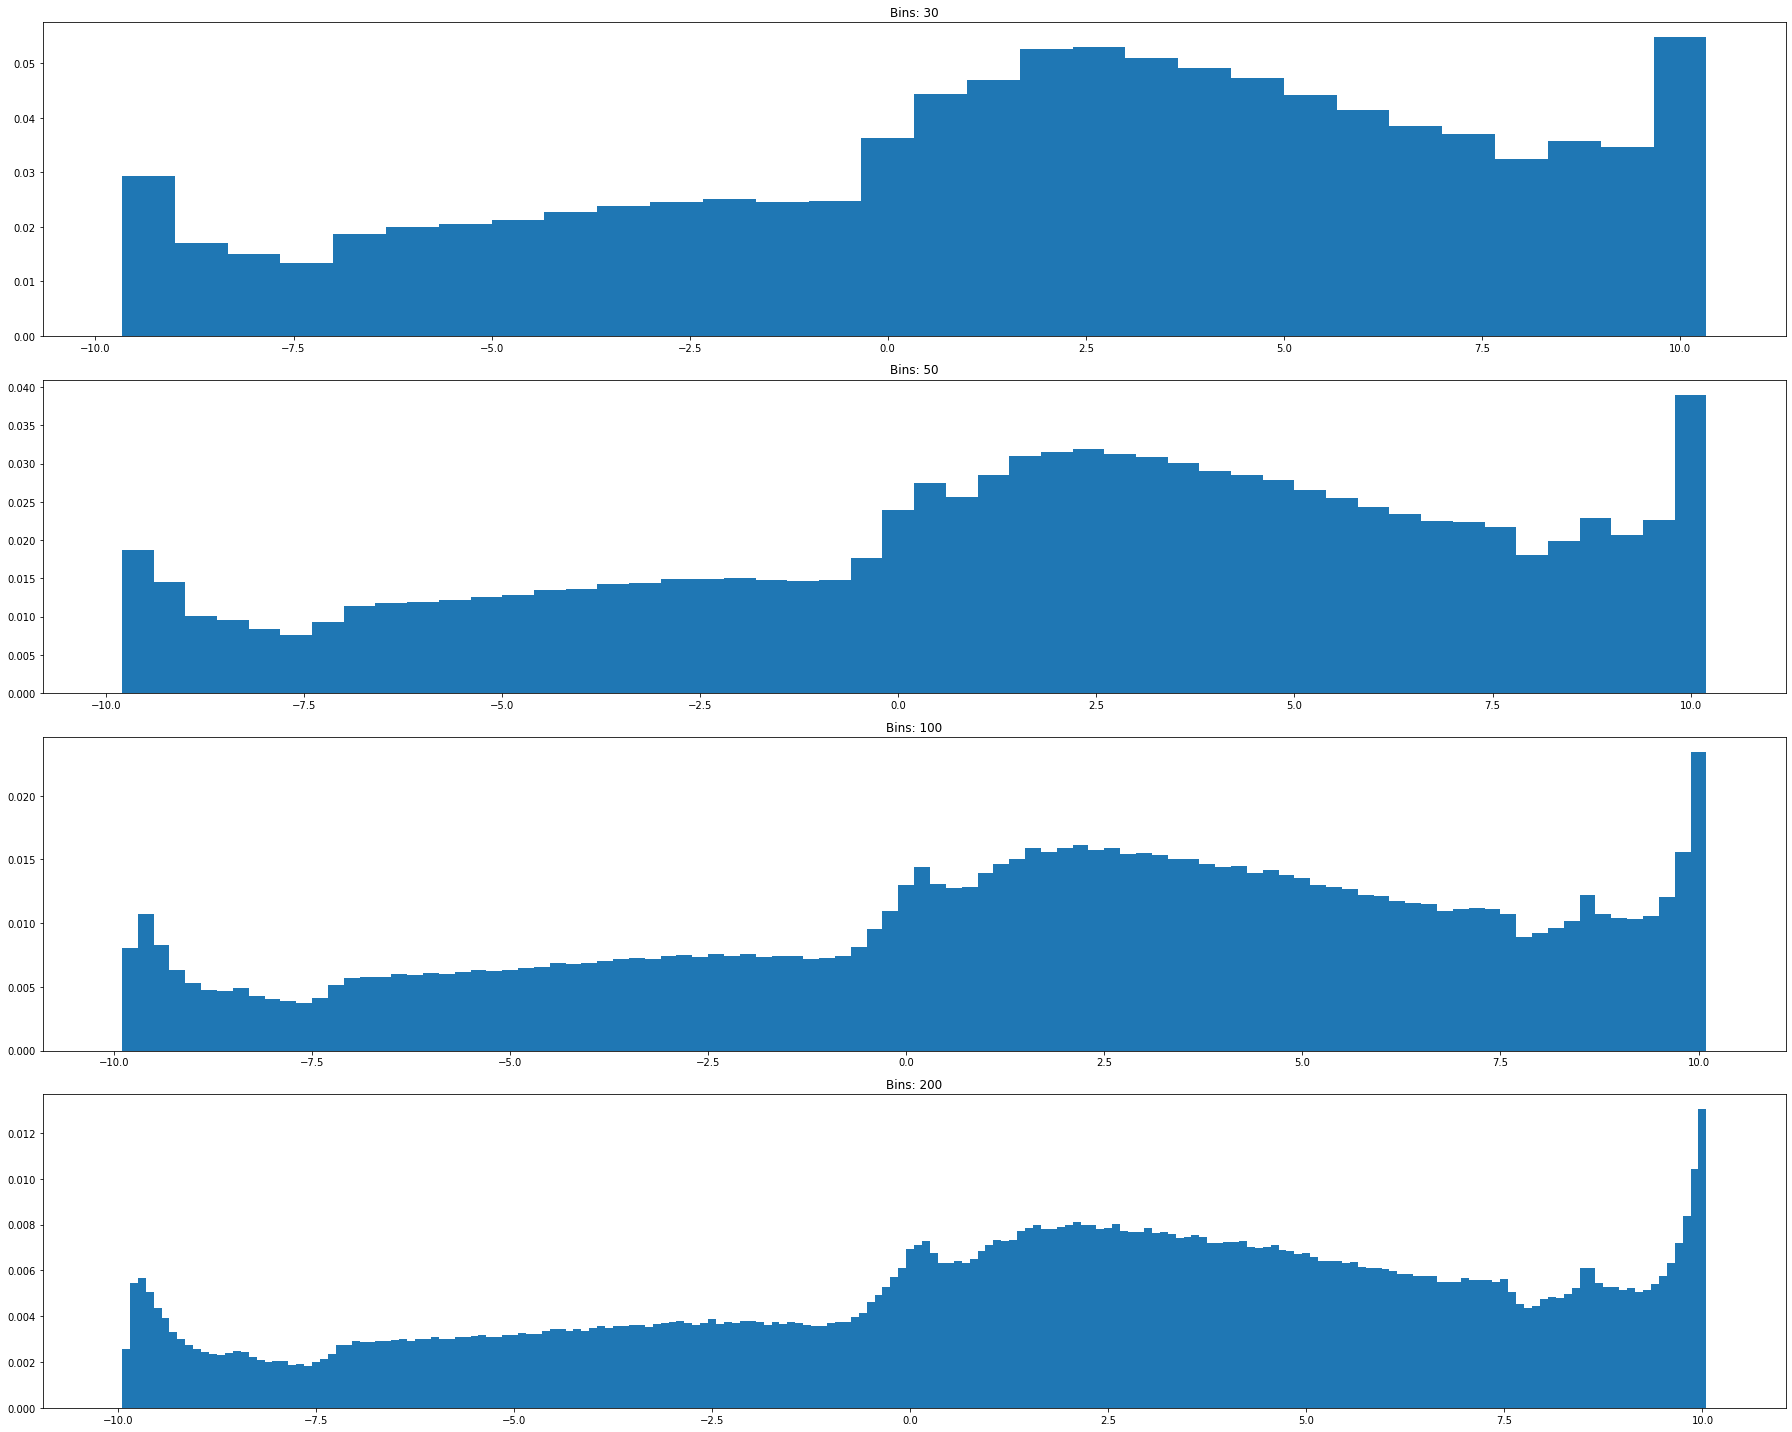

In [21]:
# Your answer here (code, histogram, response to questions)
import numpy as np
fig = plt.figure(figsize=(25,20))
n = 1
bins_list = [30, 50, 100, 200]
for bins in bins_list:
  plt.subplot(4,1,n)
  d, b = np.histogram(data[:,-1],bins=bins)
  unit_d = d/ d.sum()
  w = b[:-1] - b[1:]
  plt.bar(b[1:], unit_d, width=w)
  plt.title(f'Bins: {bins}')
  n += 1
fig.tight_layout()

d, b = np.histogram(data[:,-1],bins=100)
unit_d = d / d.sum()
w = b[:-1] - b[1:]

The density estimates are **multi-modal** and we see a roughly normal distribution with peaks at extremes. I have tried **4** different bin sizes **(number of bins = 30, 50, 100, 200)**. The peaks appear to be near the extreme ratings (-10.0 & 10.0) and in the near the 2.5 rating mark in all the cases. The number of peaks (local maximas) increase with number of bins.

### Question 2. [ 5 points ]

Perform a maximum-likelihood fit of a Gaussian distribution to the ratings and report the mean and
variance. Overlay the MLE Gaussian fit on top of the normalized histogram. Is it a good fit or a bad fit
and why?



In [22]:
# Fit MLE model
from scipy import stats
import numpy as np
from scipy.optimize import minimize

def gaussian(p):
    avg = p[0]   
    std = p[1]
    negative_log_likelihood = -np.sum(stats.norm.logpdf(data[:,-1], loc=avg, scale=std)) # negative log likelihood
    return negative_log_likelihood

initial_params = [1, 1]

res = minimize(gaussian, initial_params, method='Nelder-Mead')

In [23]:
# Report mean and variance
avg = res.x[0]
var = res.x[1]**2
print("Mean:", avg) 
print("Variance:", var)

Mean: 1.6186007041726516
Variance: 28.117319037793557


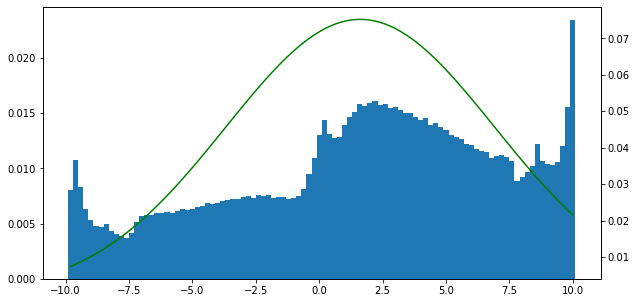

In [24]:
# Overlay two histograms
s = res.x[1]
fit = stats.norm.pdf(data[:,-1], avg, s)
fig, hist = plt.subplots(figsize=(10, 5))
mlf = hist.twinx()
hist.bar(b[1:], unit_d, width=w)
mlf.plot(b[1:], stats.norm.pdf(b[1:], avg, s),'-',color='g')
plt.show()

In [25]:
# Explain model fit

There are outliers on both the extremes but the central points seem fit well with the gaussian model with the mean of both the distributions almost aligning. It needs to account for more variance in the data.

### Question 3. [ 5 points ]

Randomly partition the data into ten disjoint sets (called folds) of approximately the same size. We will use these partitions to assess the generalization performance of these MLE fits. This is done by creating ten experiments where one fold is taken to be a “test” set and the remaining nine are together considered to be the “training” set. A model is fit on the training data and asked to make predictions of the test set. For a given model, this produces ten log probability numbers that reflect how well the model generalized to the unseen data. If the folds are of different size, the predictive log probabilities can be turned into “averages” by dividing the overall logprob by the number of test cases. Perform this procedure for your Gaussian histogram density estimators from Problem 1 and 2. That is, fit this model ten times on 9/10ths of the data and ask it to make predictions of the remaining 1/10th. To visualize the results, produce a boxplot of the average log probabilities.

In [26]:
# Perform 10-fold cross validation
from sklearn.model_selection import KFold

def gaussian(p):
    avg = p[0]   
    std = p[1]
    negative_log_likelihood = -np.sum(stats.norm.logpdf(data[train,-1], loc=avg, scale=std)) # negative log likelihood
    return negative_log_likelihood


folds = KFold(n_splits=10)
ans = []
for train, test in folds.split(data[:,-1]):
  initial_params = [1, 1]
  res = minimize(gaussian, initial_params, method='Nelder-Mead')
  avg = res.x[0]
  std = res.x[1]
  negative_log_likelihood = -np.sum(stats.norm.logpdf(data[test,-1], loc=avg, scale=std))/len(test)
  print(negative_log_likelihood)
  ans.append(negative_log_likelihood)

3.1918484126546898
3.1083141488256136
3.09334080089909
3.0599261142510032
3.016148896096349
3.0217798480642895
3.026632356695882
3.070521660029692
3.1616408384792263
3.129973963610216


{'whiskers': [<matplotlib.lines.Line2D at 0x7feecde2e550>,
 'caps': [<matplotlib.lines.Line2D at 0x7feecde2efd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7feecde27f50>],
 'medians': [<matplotlib.lines.Line2D at 0x7feecde35ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7feecde3e050>],
 'means': []}

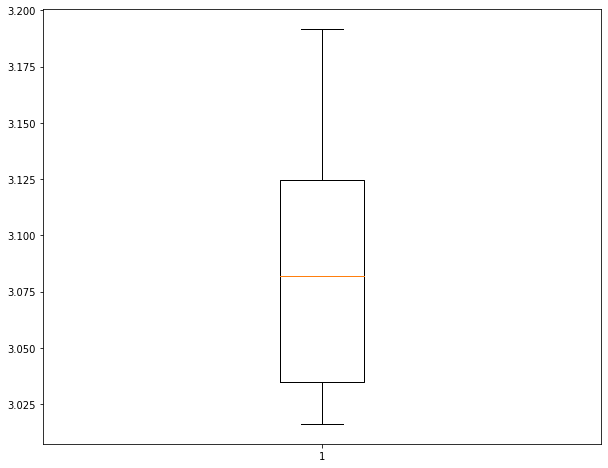

In [27]:
# Visualize results
plt.boxplot(ans)

## Section 3. Evaluation Questions  [7 points ]

1. Suppose we fit a linear model to a polynomial data. Is this model a good fit? If not, is it underfitting or overfitting? [ 2 points ]


A linear model can be fit to polynomial data as the weights(co-efficients) for the features can still be linear, and the model still remains a linear combination of features. But now, the nature of the curve we will be attempting to fit is of a higher degree (non-linear).

Like we did in the above Logistic Regression section for Problem 6, we can use different basis functions with relevant hyperparameters to train the linear model. We can make the linear model fit well with the polynomial data.

2.  How does cross validation address the problem of overfitting? Does it only identify (or detect) overfitting? Does it also eliminate (or at least reduce) overfitting? Explain
your answers. [2.5 points ]


Overfitting is caused when we have a high variance model which is very flexible such that it fits the outliers, additional variance, and performs well on the training data but is unable to generalize and fails in testing. We can split the data into a training and testing sets but even that static splitting does not use the data efficiently. Cross-validation uses the advantages of the training-testing split, while also using the data efficiently by creating folds (i.e. the whole dataset is used for training and testing but not in a single run). A list of accuracy scores are recorded correponding to different holdout folds and the cross-validation score is computed as the mean of the list of scores. The model has different data (new instances) to train at every training iteration and it generalizes well for test data. 

Cross validation can serve as a tool to check for over-fitting. If the difference between training and validation accuracy is high then it is overfitting on the training data. We cannot reduce overfitting by using cross-validation by itself. Using k-fold cross-validation in conjunction with Grid Search or some other type of hyperparamter tuning techniques, one can reduce overfitting.

3. Suppose you are given a dataset { (𝑥<sub>1</sub>, 𝑦<sub>1</sub>), (𝑥<sub>2</sub>, 𝑦<sub>2</sub>), ⋯ , (𝑥<sub>m</sub>, 𝑦<sub>m</sub>) } and you are asked to perform **5-fold cross-validation** for selecting the value of 𝜆 for $𝐿_2$ regularization for a regularized linear regression. Please describe the procedure of how you would select the value 𝜆. [2.5 points ]

Loss Function for Linear Regression using $𝐿_2$ regularization is given by :

$L(x, y) = \sum_{i = 1}^{n} \left ( y_{i} - h_{\theta}\left ( x_{i} \right ) \right )^{2} + \lambda \sum_{i=1}^{n} \theta_{i}^{2}$

We can reduce the value of lambda to make the model complex or increase it to simplify the model. We can determine an optimal value for $\lambda$ using cross-validation. Determine a range for $\lambda$ (for ex: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]).

**Step 1**: Split the data into train and test sets (80%-20% split).

**Step 2**: Split the train set into 5 equal folds.

**Step 3**: Choose a value for $\lambda$ from the range. Train the model on 4 folds and evaluate the model on holdout fold and get the score. For ex: Score = 0.48

**Step 4**: Repeat the above step k-1 = 4 times, each time on a different holdout fold, and keep a track of the scores.

**Step 5**: After Step 4, we have 5 scores. Compute Cross-Validation Score as mean of all the scores.

**Step 6**: Repeat Steps 1 to 5 for other values of lambda that you like. 

The optimal value of lambda is the one which corresponds to the best cross-validation score.

In [29]:
# Converting to PDF
!jupyter nbconvert --to PDF "/content/gdrive/MyDrive/ECE_5424_AML/HW1/ankit-parekh-SectionB.ipynb"

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [1,188 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [3,020 kB]
Get:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15